In [1]:
!pip install tensorflow

In [151]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [152]:
import pandas as pd
df = pd.read_csv ('hang_out.csv', sep=';',header=0)

features = df[['rain', 'wind', 'heat']]
labels = df['hang_out']

print(df)

   rain  wind  heat  hang_out
0     1     0     0         0
1     1     1     0         0
2     1     1     1         0
3     1     0     1         0
4     0     0     0         1
5     0     0     1         0
6     0     1     0         1
7     0     1     1         1


In [153]:
# normalization of attributes (assuming you already have numeric values in the attributes)

scaler = StandardScaler()
atributos = scaler.fit_transform(features)

# encoding
label_encoder = LabelEncoder()
classificacoes = label_encoder.fit_transform(labels)

# splitting data into sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


<font color="orange">
X = features, attributes<br>
y = classification, label<br>
test_size = training and testing division, when 0.3 means that 70% will be training and 30% will be testing

In [154]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # For Binary Classification
])

# compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [155]:
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6443 - accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6379 - accuracy: 0.6000
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6315 - accuracy: 0.8000
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6252 - accuracy: 0.8000
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6189 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6125 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6061 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6001 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 0.5945 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 13ms/step - loss: 0.5889 - accuracy: 1.0000


<font color="orange">
the code is training the model for <b> 10 epochs </b>, using <b> batches of 32 </b>training examples in each iteration

In [156]:
#Evaluating
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


1/1 [==============================] - 0s 130ms/step - loss: 0.5955 - accuracy: 1.0000
Accuracy: 1.0


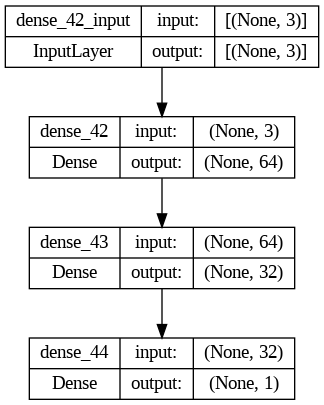

In [157]:
from tensorflow.keras.utils import plot_model


# save the neural network diagram to a file
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
